<a href="https://www.kaggle.com/code/manojs048/iris-eda?scriptVersionId=125501015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

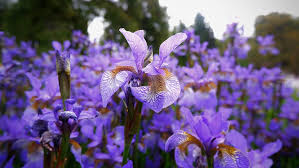

# The Iris dataset is a classic machine learning dataset that is often used for classification problems. It is sometimes referred to as the "Hello World" of machine learning because it is a simple and well-understood dataset that is often used for teaching and learning purposes.

## The dataset consists of 150 samples, each representing an iris flower. Each sample has four features: sepal length, sepal width, petal length, and petal width. The target variable is the species of the iris flower, which can be one of three classes: setosa, versicolor, and virginica.

### Here is a summary of the dataset:

### Number of samples: 150

### Number of features: 4

### Target variable: Species (setosa, versicolor, virginica)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
df=pd.read_csv("/kaggle/input/iris-classifier/iris.csv")

In [3]:
df.head ()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# EDA

In [7]:
X=df.iloc[:,[0,1,2,3]].values
y=df.iloc[:,4].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(127, 4)
(23, 4)
(127,)
(23,)


In [10]:
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.15,random_state=0)

In [11]:
print(X_train.shape)

print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)


(127, 4)
(23, 4)
(127,)
(23,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

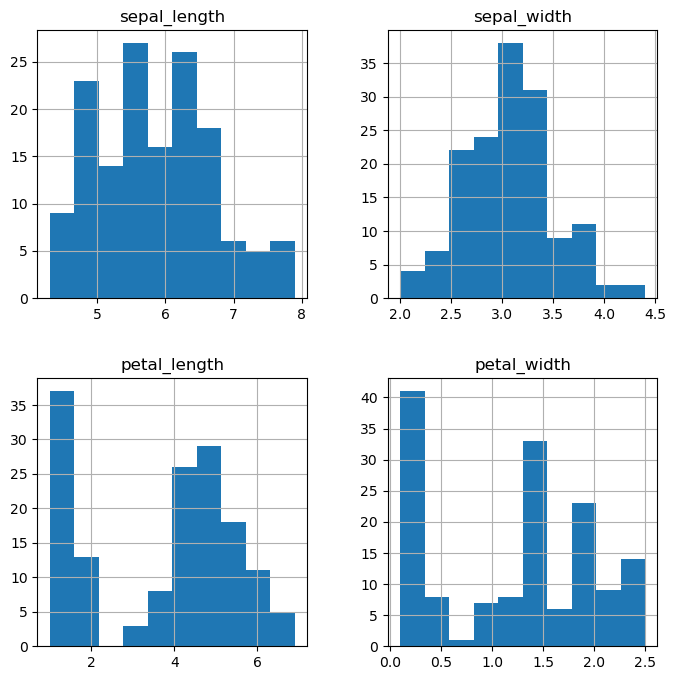

In [13]:
df.hist(figsize=(8,8))

<AxesSubplot:>

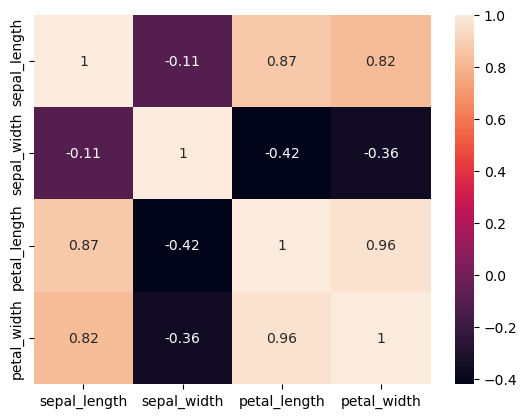

In [14]:
corr_matrix=df.corr()


sns.heatmap(corr_matrix,annot=True)

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model=DecisionTreeClassifier()
DecisionTree_model.fit(X_train,y_train)
y_pred=DecisionTree_model.predict(X_test)


In [16]:
df['species']=df.species.astype('category').cat.codes
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [17]:
from sklearn import metrics

In [18]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

1.0

In [19]:
print(y_pred)
print(y_test)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa']


In [20]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model=RandomForestClassifier(n_estimators=200,max_depth=10)
RandomForest_model.fit(X_train,y_train)
y_pred=RandomForest_model.predict(X_test)


In [21]:
from sklearn import metrics

In [22]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

1.0

<BarContainer object of 150 artists>

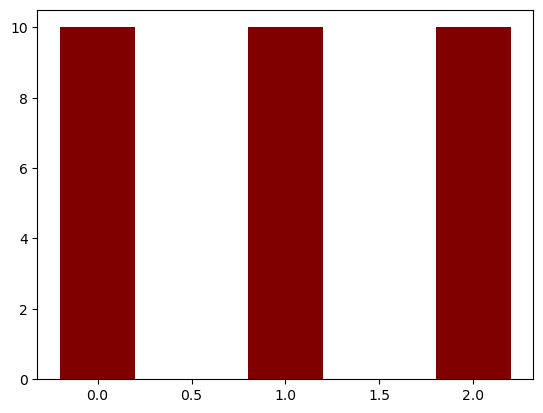

In [23]:
plt.bar(df['species'],color='maroon',width=0.4,height=10)

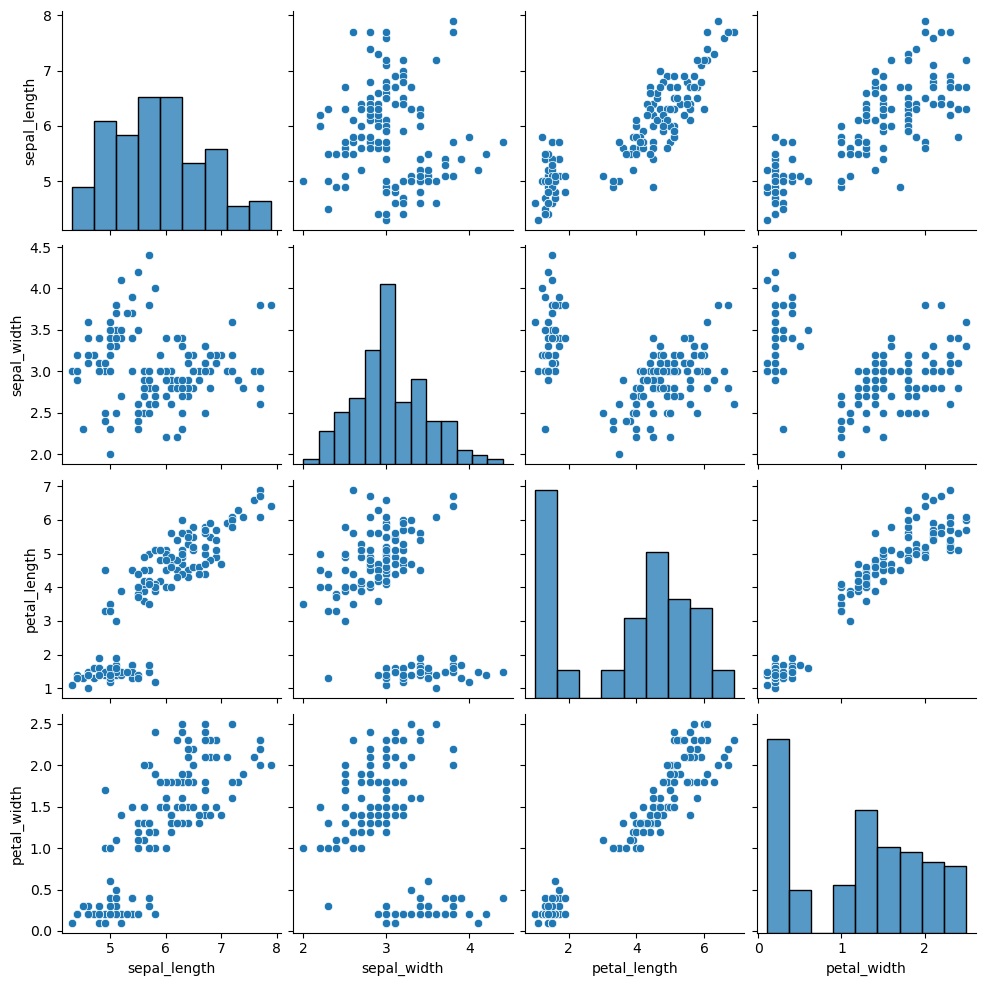

In [24]:
sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width']])

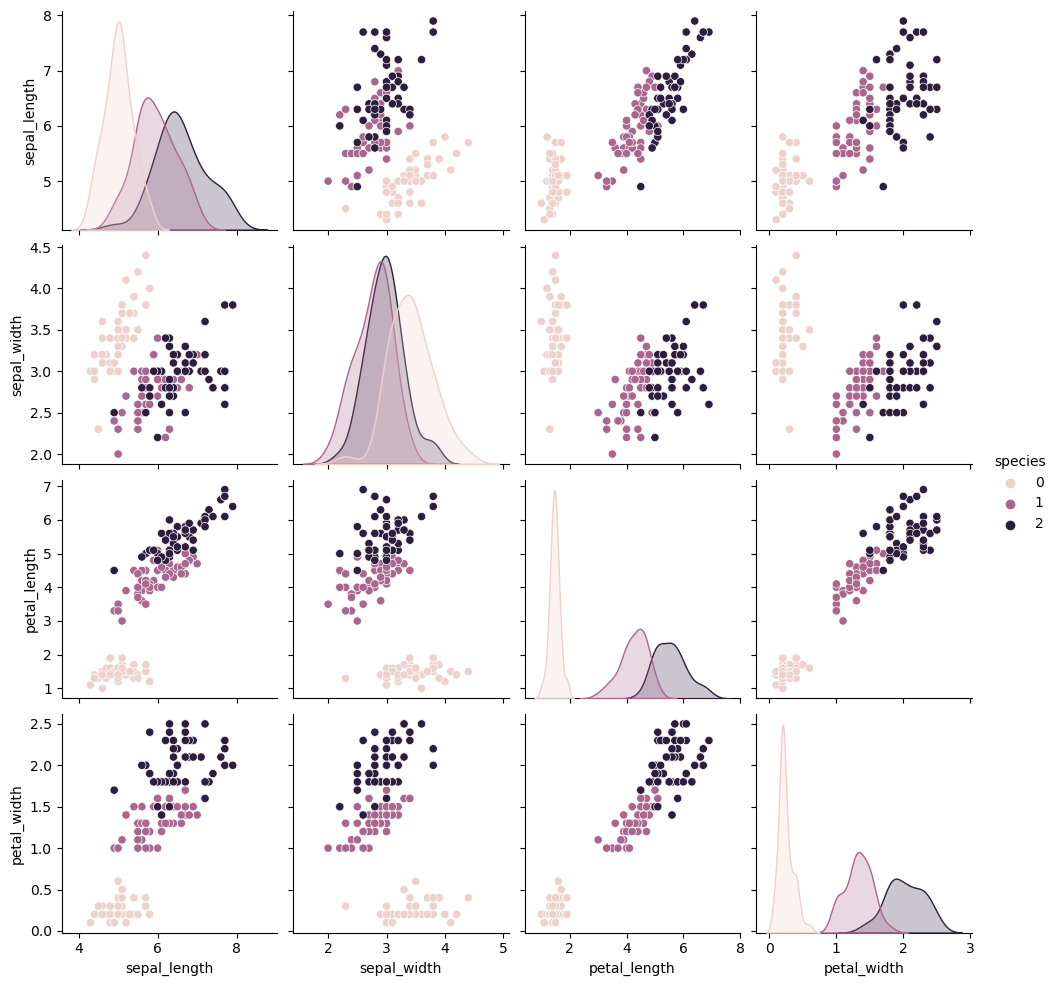

In [25]:
sns.pairplot(df,hue='species')

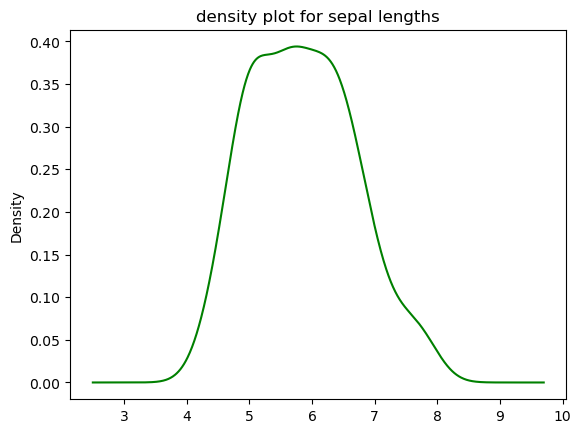

In [26]:
df.sepal_length.plot.density(color='green')
plt.title('density plot for sepal lengths')
plt.show()